# Imports

In [6]:
import os
import warnings

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import numpy as np
import matplotlib.colors as colors
import glob

SuppressWarnings = True
SuppressPlots = False

## Suppress Warnings
if SuppressWarnings:
    warnings.filterwarnings("ignore")
if SuppressPlots:
    import matplotlib
    matplotlib.use("Agg")
    
print(datetime.datetime.ctime(datetime.datetime.today()))
print("Matplotlib: ", mpl.__version__)
print("Numpy     : ", np.__version__)
print("Pandas   : ", pd.__version__)
print("Xarray   : ", xr.__version__)

Thu Oct 12 06:31:29 2023
Matplotlib:  3.7.2
Numpy     :  1.24.4
Pandas   :  2.0.3
Xarray   :  2023.6.0


# Functions

In [7]:
def plot(X, Y, Z, title):
    
    # Create a figure with specified size
    fig = plt.figure(figsize=(11, 6.5))

    # Set the axes using the Robinson projection
    ax = plt.axes(projection=ccrs.Robinson())

    # Set the colormap and normalization
    cmap = plt.get_cmap('coolwarm')
    norm = colors.Normalize(vmin=-2, vmax=38)

    # Add cyclic point to the data for smooth plotting
    Z, lons = add_cyclic_point(Z, coord=X)

    # Plot the data using contourf
    cs = ax.contourf(lons, Y, Z, levels=10, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)

    # Add coastlines to the plot
    ax.coastlines()

    # Add colorbar to the plot
    cbar = plt.colorbar(cs, shrink=0.6, orientation='horizontal', label='SST (Celsius)')

    # Set the title of the plot
    plt.title(title)

    # Display the plot
    plt.show()

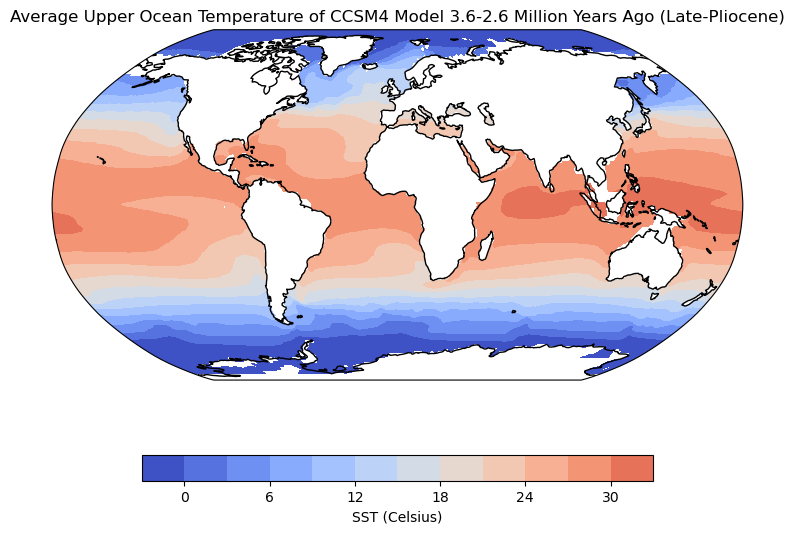

In [11]:
# Define the directory path
path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/CCSM4_plio.nc'
ds = xr.open_dataset(path)
plot(
    ds['lon'],
    ds['lat'],
    ds['TEMP'][0, :, :],
    title= "Average Upper Ocean Temperature of CCSM4 Model 3.6-2.6 Million Years Ago (Late-Pliocene)")